In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [21]:
df = pd.read_excel("ByCountry.xlsx")
display(df)

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,CH4,0.690058,0.711647,0.715404,0.723178,0.724303,...,1.315299,1.205947,1.215895,1.215991,1.212791,1.216261,1.229064,1.238812,1.236951,1.253603
1,Non-Annex_I,India +,AFG,Afghanistan,CH4,460.468952,459.987498,410.079272,424.294473,447.532987,...,635.108298,633.899417,652.455564,634.218144,631.618821,631.518334,648.604064,666.402361,678.895149,686.695412
2,Non-Annex_I,Southern_Africa,AGO,Angola,CH4,331.473860,338.785284,365.473237,387.023904,394.297567,...,1678.470088,1704.843512,1687.072973,1771.758159,1735.070851,1708.445361,1629.852315,1582.485324,1409.209127,1391.401764
3,Non-Annex_I,Rest Central America,AIA,Anguilla,CH4,0.087644,0.067903,0.067979,0.068016,0.068076,...,0.148216,0.150215,0.151825,0.153367,0.154159,0.154925,0.155362,0.156325,0.156624,0.157886
4,Int. Aviation,Int. Aviation,AIR,Int. Aviation,CH4,1.184419,1.184419,1.253158,1.307282,1.257480,...,3.305747,3.363027,3.472955,3.668980,3.849979,4.097752,4.294435,4.332702,2.371584,2.736444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Non-Annex_I,Oceania,WSM,Samoa,CH4,2.999976,2.999272,3.011148,3.039117,3.163481,...,6.380489,6.503310,6.754006,7.060327,7.226540,7.077683,7.232787,7.363467,7.487643,7.614300
206,Non-Annex_I,Middle_East,YEM,Yemen,CH4,111.631813,119.481859,119.209757,116.451944,122.701159,...,719.672541,794.429495,757.576186,497.519127,448.305099,457.014845,456.750119,484.143190,500.020735,506.685942
207,Non-Annex_I,Southern_Africa,ZAF,South Africa,CH4,1489.052159,1508.049428,1525.816866,1582.430727,1642.960777,...,3312.385369,3310.568773,3344.907904,3322.641993,3271.887979,3294.815938,3282.539447,3282.274487,2786.943971,3000.739586
208,Non-Annex_I,Southern_Africa,ZMB,Zambia,CH4,144.438406,146.443482,150.605022,153.545892,155.951627,...,410.164010,421.851373,431.076018,428.530186,431.104563,438.476614,441.603479,445.639911,448.061316,448.560500


In [27]:
df2 = df.iloc[1, 5:56].to_numpy()

array([460.46895217113, 459.98749758199, 410.07927247913, 424.29447331759,
       447.53298747517, 471.29274622998, 473.68025366775, 466.65207159999,
       463.96982949209, 454.54923908307, 455.42691019103, 450.72062308991,
       444.98096148783, 422.70010139349, 380.91926926686, 351.77417024881,
       307.77093665807, 312.53615079188, 322.50064012978, 304.79999824717,
       309.6546379493, 315.29304383189, 321.09675477988, 328.6416953865,
       342.39925279237, 358.57731387262, 399.7253834573, 431.28878134921,
       454.58282588377, 484.26663382736, 435.10051865479, 385.57054591525,
       467.01150462532, 483.15756851945, 488.32580373222, 482.45959676971,
       487.21212976389, 505.56371323759, 548.5452492406, 567.60762393158,
       634.71058557725, 649.04909236048, 635.10829805662, 633.89941669425,
       652.45556414347, 634.21814357673, 631.61882077928, 631.51833380139,
       648.60406380959, 666.40236079664, 678.89514880537], dtype=object)

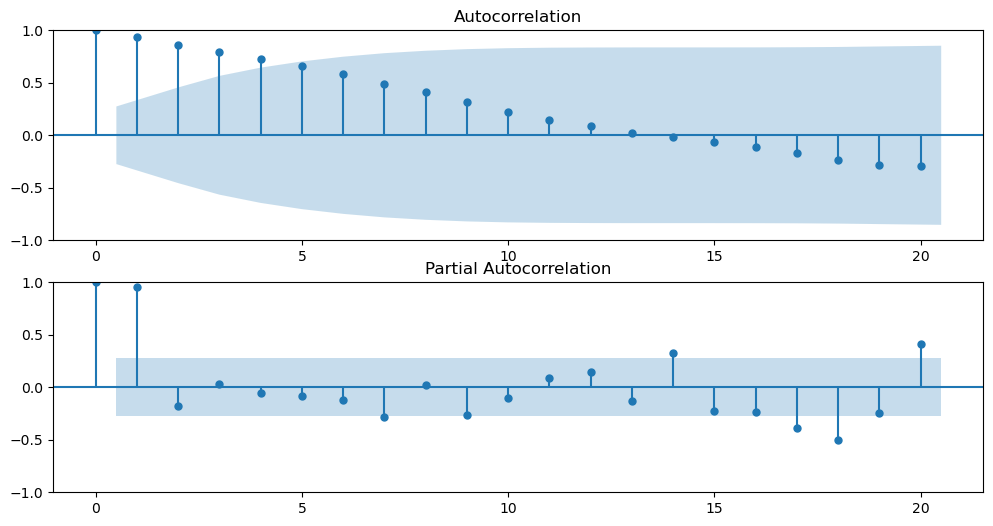

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df2, ax=ax1, lags=20)
plot_pacf(df2, ax=ax2, lags=20)
plt.show()

In [36]:
p, d, q = (5, 1, 0) 
df2 = df2.astype(np.float64)
model = ARIMA(df2, order=(p, d, q))
model_fit = model.fit()

In [41]:
n_forecast = 10 
forecast = model_fit.forecast(steps=n_forecast)
print(forecast)

[682.21866455 683.27828874 685.80322009 688.12533232 689.68295306
 690.44149123 690.77904214 691.142552   691.47295097 691.688751  ]


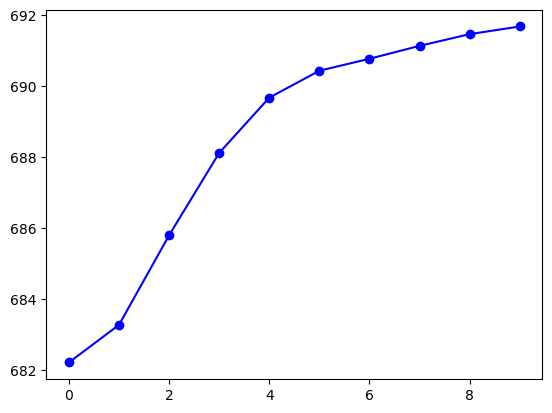

In [43]:
time_index = np.arange(len(forecast))

plt.plot(time_index, forecast, marker='o', linestyle='-', color='b', label='Time Series Data')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Time Series Plot with Even Gaps')
# plt.grid(True)
# plt.legend()
plt.show()